# Analysis 

- From bubble plot, one of the observations is that urban cities have the highest driver concentration and rural cities have the least. This fact helps to explain why urban cities the greatest total number of ride percentages and rural cities have the least.
- By looking at the driver distribution from pie chart, drivers in rural cities makes up only about 2.6% (~ 77 drivers) compared to 86.7% (~ 2405 drivers) in urban cities and 16.5 % (~ 625 drivers) for sub-urban cities. Based on the ride percentage pie chart, the drivers in rural cities contributed about 5.3% ( ~ 125 rides) which is equivalent to 1.6 ride/driver. This ratio is 1.27 ride/driver in sub-urban cities and .67 ride/driver in urban cities. These statistics show that on average, even though the total demand in urban cities is the highest, drivers in rural cities actually are the ones who stay most busy by giving 1.6ride/driver compared to .6 ride/driver in urban cities. This makes sense because urban cities are over-saturated with drivers as discussed above.
- Another point that should be mentioned is that, based on the display from bubble plot of total number of rides vs average fare, one can see that rural cities, on average have higher fares compared to fares in urban cities or suburban cities. Since rural drivers tend to be busier and the fares are on average higher, we can infer that driver in rural cities have higher total gross earnings compared to drivers in other cities. However, based on the statistics given, we cannot conclude the overall driver profits because of several factor such as gas, tolls.. and this is one of the limitations of these datasets.
- The original datasets do not have good description for each variable and the unit also seems to be missing. For example, one does not know if whether currency unit for ride fares in each city is in thousand or million dollars.  

In [38]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_file = "data/city_data.csv"
ride_file = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_file)
ride_data =pd.read_csv(ride_file)

# Combine the data into a single dataset
combine_data = pd.merge(ride_data,city_data, on = 'city', how = 'left')

# Display the data table for preview
combine_data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

In [2]:
#define a function to obtain data for bubble plot
def get_coordinates(city_data):
    y = []
    x = []
    size = []
    result = []
    cities = city_data['city'].unique()
    for city in cities:
        driver = city_data[city_data['city'] == city]['driver_count']
        fare_data = city_data[city_data['city'] == city]['fare']
        total_fare = sum(fare_data)
        avg_fare = total_fare/len(fare_data)
        x.append(len(fare_data))
        y.append(avg_fare)
        size.append(int(driver.sum()/len(driver))*10)
    result.append(x) 
    result.append(y)
    result.append(size)
    return result

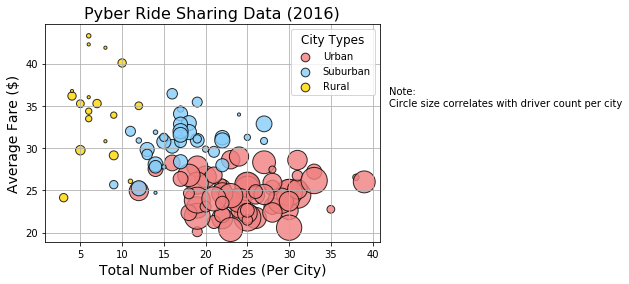

In [3]:
# Obtain the x and y coordinates for each of the three city types
urban_dataFrame = combine_data[combine_data['type']=='Urban']
suburban_dataFrame = combine_data[combine_data['type']=='Suburban']
rural_dataFrame = combine_data[combine_data['type']== 'Rural']

#Getting coordinates 
urban_coord = get_coordinates(urban_dataFrame)
suburban_coord = get_coordinates(suburban_dataFrame)
rural_coord = get_coordinates(rural_dataFrame)

# Build the scatter plots for each city types
plt.scatter(urban_coord[0],urban_coord[1],s=urban_coord[2],alpha= 0.8, color = 'lightcoral',edgecolor = 'black')
plt.scatter(suburban_coord[0],suburban_coord[1],s=suburban_coord[2],alpha= 0.8, color = 'lightskyblue',edgecolor = 'black')
plt.scatter(rural_coord[0],rural_coord[1],s=rural_coord[2],alpha= 0.8, color = 'gold',edgecolor = 'black')
plt.grid()

#Title 
plt.title('Pyber Ride Sharing Data (2016)',size = 16)
plt.xlabel('Total Number of Rides (Per City)',size = 14)
plt.ylabel('Average Fare ($)',size = 14)

# Create a legend
leged = plt.legend(['Urban','Suburban','Rural'], title = 'City Types')
plt.setp(leged.get_title(),fontsize='large')
leged.legendHandles[0]._sizes = [75]
leged.legendHandles[1]._sizes = [75]
leged.legendHandles[2]._sizes = [75]

# Incorporate a text label regarding circle size
plt.text(42,35,"Note:\nCircle size correlates with driver count per city")

# Save Figure
plt.savefig('save_figures/2016_Pyber_Bubble_plot.png')

## Total Fares by City Type

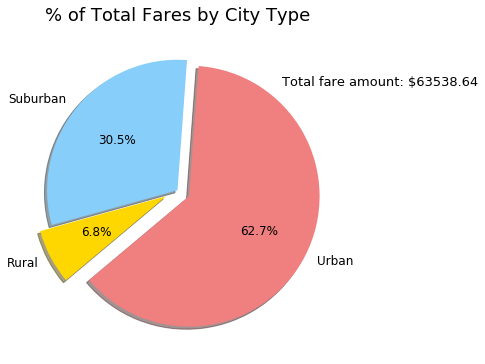

In [54]:
# Calculate Type Percents
fare_list = [urban_dataFrame['fare'].sum(), suburban_dataFrame['fare'].sum(), rural_dataFrame['fare'].sum()]
labels = combine_data['type'].unique()
colors = ['lightcoral', 'lightskyblue', 'gold']
# Build Pie Chart
fig, ax = plt.subplots(figsize=(10, 6))
explode = [0.1 , 0, 0.1]

ax.pie(fare_list, autopct = "%1.1f%%", labels=labels, explode= explode, startangle = 220, shadow = True, colors = colors, textprops={'fontsize':12})
ax.set_title("% of Total Fares by City Type", {'fontsize': 18})
ax.text(.8,.8,'Total fare amount:'f" ${combine_data['fare'].sum()}",{'fontsize': 13})

# Save Figure
plt.savefig('save_figures/Total Fare % by City Type.png')

## Total Rides by City Type

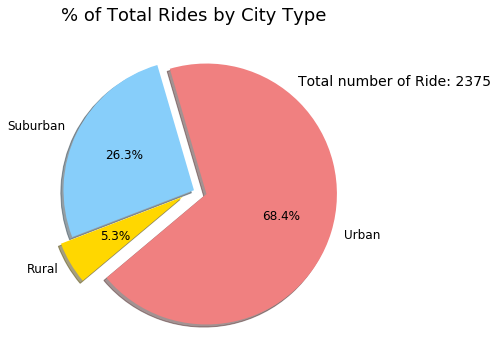

In [43]:
# Calculate Rides Percents
ride_list = [len(urban_dataFrame['ride_id']), len(suburban_dataFrame['ride_id']), len(rural_dataFrame['ride_id'])]
labels = combine_data['type'].unique()
colors = ['lightcoral', 'lightskyblue', 'gold']

# Build Pie Chart
fig, ax = plt.subplots(figsize=(10, 6))
explode = [0.1 , 0, 0.1]

ax.pie(ride_list, autopct = "%1.1f%%", labels=labels, explode= explode, startangle = 220, shadow = True, colors = colors, textprops={'fontsize':12})
ax.set_title("% of Total Rides by City Type", {'fontsize': 18})
ax.text(.8,.8,'Total number of Ride:' f" {len(combine_data)}",{'fontsize': 14})
# Save Figure

plt.savefig('save_figures/Total Rides % .png')

## Total Drivers by City Type

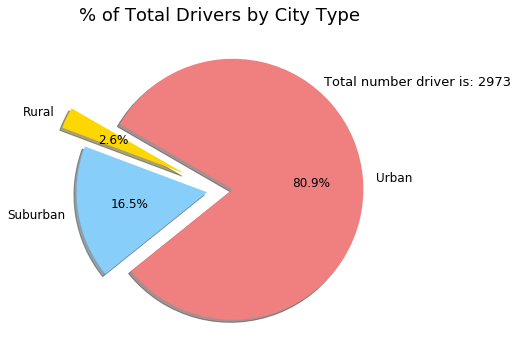

In [117]:
# Calculate Driver Percents
driver_by_type = city_data.groupby('type').sum()
driver_list = []
labels = []
for value in a.index:
    count = driver_by_type.loc[value,'driver_count']
    driver_list.append(count)
    labels.append(value)

colors = ['gold', 'lightskyblue', 'lightcoral']
# Build Pie Chart
fig, ax = plt.subplots(figsize=(10, 6))
explode = [0.3 , 0.1, 0.1]

ax.pie(driver_list, autopct = "%1.1f%%", labels=labels, explode= explode, startangle = 150, shadow = True, colors = colors, textprops={'fontsize':12})
ax.set_title("% of Total Drivers by City Type", {'fontsize': 18})
ax.text(.8,.8,'Total number driver is:' f" {city_data['driver_count'].sum()}",{'fontsize': 13})

# Save Figure
plt.savefig('save_figures/Total Drivers % by City Type.png')

In [119]:
driver_list

[78, 490, 2405]

In [120]:
ride_list

[1625, 625, 125]